# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [2]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-26 00:00:00-04:00,5460.709961,5483.140137,5451.870117,5477.899902,3563920000,0.0,0.0
2024-06-27 00:00:00-04:00,5473.589844,5490.810059,5467.540039,5482.870117,3589530000,0.0,0.0
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,0.0,0.0
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,0.0,0.0
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,0.0,0.0


In [3]:
symbol = '^SPX'
dfo = yf.Ticker(symbol)

In [4]:
dfo.options

('2024-07-03',
 '2024-07-05',
 '2024-07-08',
 '2024-07-09',
 '2024-07-10',
 '2024-07-11',
 '2024-07-12',
 '2024-07-15',
 '2024-07-16',
 '2024-07-17',
 '2024-07-18',
 '2024-07-19',
 '2024-07-22',
 '2024-07-23',
 '2024-07-24',
 '2024-07-25',
 '2024-07-26',
 '2024-07-29',
 '2024-07-30',
 '2024-07-31',
 '2024-08-01',
 '2024-08-02',
 '2024-08-05',
 '2024-08-06',
 '2024-08-08',
 '2024-08-09',
 '2024-08-16',
 '2024-08-30',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-10-31',
 '2024-11-15',
 '2024-11-29',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-05-16',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-09-19',
 '2025-12-19',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [5]:
dfo_exp = dfo.option_chain(dfo.options[1])

In [6]:
dfo_exp.calls.head(20) #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240705C01400000,2024-06-27 16:29:57+00:00,1400.0,4080.95,4132.4,4134.8,0.000000,0.000000,NaN,6,0.00001,True,REGULAR,USD
1,SPXW240705C03400000,2024-06-04 17:20:50+00:00,3400.0,1887.47,2133.5,2136.0,0.000000,0.000000,2.0,2,0.00001,True,REGULAR,USD
2,SPXW240705C03500000,2024-06-04 17:20:50+00:00,3500.0,1787.95,2033.5,2036.0,0.000000,0.000000,2.0,2,0.00001,True,REGULAR,USD
3,SPXW240705C03900000,2024-06-28 13:53:35+00:00,3900.0,1606.03,1633.1,1636.2,0.000000,0.000000,2.0,0,0.00001,True,REGULAR,USD
4,SPXW240705C03950000,2024-06-26 13:30:07+00:00,3950.0,1514.49,1584.2,1586.2,0.000000,0.000000,1.0,0,0.00001,True,REGULAR,USD
5,SPXW240705C04000000,2024-07-01 19:03:07+00:00,4000.0,1470.59,1533.6,1536.2,0.000000,0.000000,30.0,5131,0.00001,True,REGULAR,USD
6,SPXW240705C04150000,2024-06-28 13:43:19+00:00,4150.0,1352.88,1384.3,1386.3,0.000000,0.000000,17.0,17,0.00001,True,REGULAR,USD
7,SPXW240705C04250000,2024-07-03 16:27:45+00:00,4250.0,1282.34,1283.8,1286.4,57.099976,4.660309,2.0,2,0.00001,True,REGULAR,USD
8,SPXW240705C04300000,2024-07-03 16:21:55+00:00,4300.0,1232.88,1233.3,1236.2,57.959960,4.933098,2.0,6,0.00001,True,REGULAR,USD
9,SPXW240705C04375000,2024-06-28 16:57:24+00:00,4375.0,1112.19,1158.9,1161.5,0.000000,0.000000,1.0,1,0.00001,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [7]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close']) - np.log(df['Close'].shift(1)) #shifting backward
    log_return = log_return[1:]
    daily_vol = log_return.std()
    vol = daily_vol*(252**0.5)

    return vol

In [8]:
vol = annual_vol(df)
vol

0.15776771787352284

# **BLACK-SCHOLES MODEL**


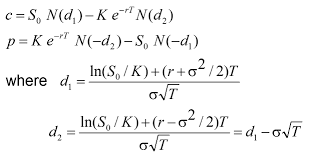

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [9]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """



    d1 = (np.log(S/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if option == 'call':
        premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
    if option == 'put':
        premium =  K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)

    return premium

In [10]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [11]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
1400.0,4109.009848
3400.0,2109.009967
3500.0,2009.009972
3900.0,1609.009996
3950.0,1559.009999


In [12]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
1400.0,4080.95
3400.0,1887.47
3500.0,1787.95
3900.0,1606.03
3950.0,1514.49


In [13]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
1400.0,4109.009848,4080.95
3400.0,2109.009967,1887.47
3500.0,2009.009972,1787.95
3900.0,1609.009996,1606.03
3950.0,1559.009999,1514.49
4000.0,1509.010002,1470.59
4150.0,1359.010011,1352.88
4250.0,1259.010017,1282.34
4300.0,1209.010020,1232.88
4375.0,1134.010024,1112.19


<Axes: >

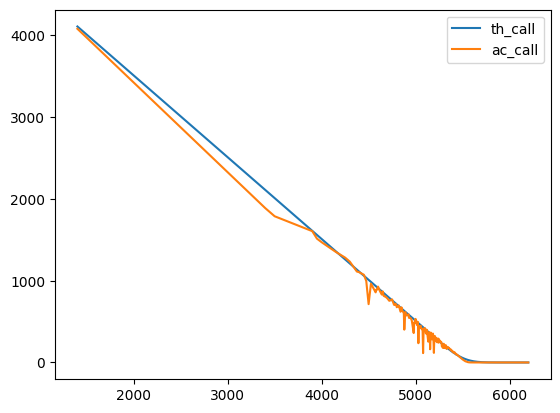

In [14]:
call.plot() #plotting the actual and theoretical call prices

In [15]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
1800.0,0.000000e+00
2000.0,0.000000e+00
2200.0,0.000000e+00
2400.0,4.119301e-277
2600.0,1.304422e-226


In [16]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
1800.0,0.10
2000.0,0.05
2200.0,0.05
2400.0,0.05
2600.0,0.05


In [17]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
5650.0,150.255351,118.00
5690.0,185.956531,202.24
5700.0,195.197109,182.30
5720.0,213.972194,238.41
5730.0,223.485404,209.42
5750.0,242.715730,277.62
5770.0,262.163796,288.29
5780.0,271.952022,308.49
5850.0,341.202414,369.62
6050.0,540.990695,580.81


<Axes: >

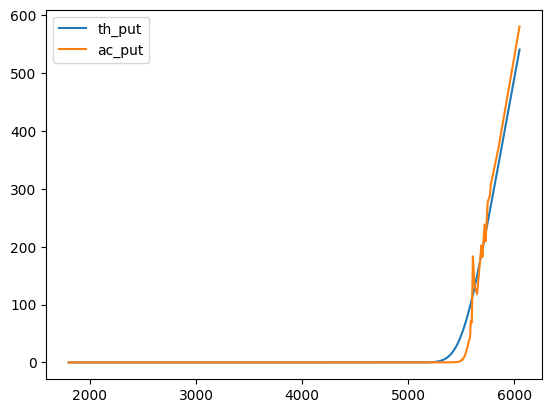

In [18]:
put.plot()